## Import libraries and Data

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
from langdetect import detect
from tqdm import tqdm
from tqdm.auto import tqdm

tqdm.pandas()

In [7]:
!pip install matplotlib

     |████████████████████████████████| 11.2 MB 20.7 MB/s 
     |████████████████████████████████| 1.1 MB 5.7 MB/s 
     |████████████████████████████████| 880 kB 2.6 MB/s 
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
     |████████████████████████████████| 3.1 MB 5.0 MB/s 
  Using cached tomli-1.2.2-py3-none-any.whl (12 kB)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
import os
os.getcwd()

'/work'

In [4]:
courses_df = pd.read_csv('./course_chula_full.csv', index_col=0)

In [5]:
courses_df

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
0,2000503,Research Ethics,RESEARCH ETHICS,Definition of research and research ethics; da...,จริยธรรมการวิจัย,ความหมายของงานวิจัยและจริยธรรมการวิจัย การได้ม...
1,2000504,Social Change Initiative Implementation,SOC CHG IMP,Principle on social change initiative towards ...,การดําเนินงานตามแผนปฏิบัติการเพื่อการเปลี่ยนแป...,หลักการการริเริ่มการเปลี่ยนแปลงของสังคมโลกที่ม...
2,2000601,CORPORATE GOVERNANCE,CORP GOVERNANCE,-,กิจการภิบาล,ภาพรวมของกิจการภิบาล ปัญหาและต้นทุนของตัวแทน ก...
3,2000611,Study Abroad I,STUDY ABROAD I,Study additional courses abroad according to t...,การศึกษาต่างประเทศ 1,การศึกษารายวิชาเพิ่มเติมในต่างประเทศตามที่หลัก...
4,2000612,Study Abroad II,STUDY ABROAD II,Study additional courses abroad according to t...,การศึกษาต่างประเทศ 2,การศึกษารายวิชาเพิ่มเติมในต่างประเทศตามที่หลัก...
...,...,...,...,...,...,...
25249,JDBA931,READING AND CONFERENCES IN TERNATIONAL BUSINESS,-,Advanced or specialized topics in internationa...,-,-
25250,JDBA936,DISSERTATION,-,This course is for the doctoral students who a...,-,-
25251,JDBA941,READING AND CONFERENCES IN MARKETING,-,Advanced or specialized topics in marketing wh...,-,-
25252,JDBA946,DISSERTATION,-,This course is for the doctoral students who a...,-,-


## Data Exploration

In [6]:
def detect_language(text):
  if text == '-':
    return text
  try:
    return detect(text)
  except:
    return 'err'

In [7]:
description_thai_language = courses_df['description_thai'].progress_apply(detect_language)

  0%|          | 0/25254 [00:00<?, ?it/s]

In [8]:
description_thai_language.value_counts()

th    22880
-      2360
de       11
en        3
Name: description_thai, dtype: int64

In [9]:
courses_df[(description_thai_language != 'th') & (description_thai_language != '-')]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
286,2007894,DOCTORAL DISSERTATION SEMINAR,DOC DISS SEM,S/U,สัมมนาวิทยานิพนธ์ระดับดุษฎีบัณฑิต,S/U
324,2008896,Comprehensive Examination,COMPREHENSIVE EXAM,S/U,การสอบประมวลความรู้,S/U
417,2010897,QUALIFYING EXAMINATION,QUALIFYING EXAM,การสอบวัดคุณสมบัติ,การสอบวัดคุณสมบัติ,QUALIFYING EXAMINATION
446,2013811,THESIS,THESIS,-,วิทยานิพนธ์,S/U
2431,2109520,PHYSICAL CERAMICS,PHY CERAMICS,Physical and chemical process responsible for ...,เซรามิกกายภาพ,Physical and chemical process responsible for ...
4837,2208896,COMPREHENSIVE EXAMINATION,COM EXAM,S/U,สอบประมวลความรู้,S/U
5820,2231841,SEMINAR IN FRENCH LANGUAGE AND LITERATURE I,SEM FR LANG LIT I,S/U,สัมมนาภาษาและวรรณคดีฝรั่งเศส 1,S/U
5821,2231842,SEMINAR IN FRENCH LANGUAGE AND LITERATURE II,SEM FE LAND LIT II,S/U,สัมมนาภาษาและวรรณคดีฝรั่งเศส 2,S/U
5822,2231894,DOCTORAL DISSERTATION SEMINAR,DOC DISS SEM,S/U,สัมมนาวิทยานิพนธ์ระดับดุษฎีบัณฑิต,S/U
10417,2600896,COMPREHENSIVE EXAMINIATION,COMPREHENSIVE EXAM,(S/U),การสอบประมวลความรู้,S/U


In [10]:
courses_df.iloc[17405]['description_thai']

'ปฏิบัติงานฝึกทำผ่าตัดที่ยากขึ้น เช่น transurethral resection of prostate, reconstructive surgery อย่างง่าย เช่น pyeloplasty, urethroplasty, vasovasostomy, urinary diversion, radialsurgery อย่างง่าย เช่น radical nephrectomy, radical orchiectomy'

In [11]:
course_name_thai_language = courses_df['course_name_thai'].progress_apply(detect_language)

  0%|          | 0/25254 [00:00<?, ?it/s]

In [12]:
course_name_thai_language.value_counts()

th    24589
-       663
en        2
Name: course_name_thai, dtype: int64

In [13]:
courses_df[(course_name_thai_language != 'th') & (course_name_thai_language != '-')]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
666,2023505,ENGY CONSERV IND,การอนุรักษ์พลังงานในภาคอุตสาหกรรม,Principles and process of energy conservation ...,Energy Conservation in Industry,หลักการและกระบวนการในการดำเนินการอนุรักษ์พลังง...
21649,3341711,PHARMACEUTICAL CHEMISTRY AND NATURAL PRODUCTS ...,-,Oral presentation and discussion of selected a...,PH CHM NAT SEM II,-


## Clean Data

In [14]:
courses_df_clean = courses_df[((description_thai_language == 'th') & (course_name_thai_language == 'th'))]

In [15]:
courses_df_clean

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
0,2000503,Research Ethics,RESEARCH ETHICS,Definition of research and research ethics; da...,จริยธรรมการวิจัย,ความหมายของงานวิจัยและจริยธรรมการวิจัย การได้ม...
1,2000504,Social Change Initiative Implementation,SOC CHG IMP,Principle on social change initiative towards ...,การดําเนินงานตามแผนปฏิบัติการเพื่อการเปลี่ยนแป...,หลักการการริเริ่มการเปลี่ยนแปลงของสังคมโลกที่ม...
2,2000601,CORPORATE GOVERNANCE,CORP GOVERNANCE,-,กิจการภิบาล,ภาพรวมของกิจการภิบาล ปัญหาและต้นทุนของตัวแทน ก...
3,2000611,Study Abroad I,STUDY ABROAD I,Study additional courses abroad according to t...,การศึกษาต่างประเทศ 1,การศึกษารายวิชาเพิ่มเติมในต่างประเทศตามที่หลัก...
4,2000612,Study Abroad II,STUDY ABROAD II,Study additional courses abroad according to t...,การศึกษาต่างประเทศ 2,การศึกษารายวิชาเพิ่มเติมในต่างประเทศตามที่หลัก...
...,...,...,...,...,...,...
25191,6800682,Doctoral Seminar II,DOC SEMINAR II,Seminar for consideration of issues related to...,สัมมนาปริญญาเอก 2,สัมมนาประเด็นที่สัมพันธ์กับวิทยานิพนธ์
25201,6800810,Special Project,SPEC PROJECT,For those who have not botained an MPH degree ...,โครงการพิเศษ,สำหรับผู้ที่ยังไม่ได้รับปริญญาสาธารณสุขศาสตรมห...
25206,857701,SEMINAR I,-,Serminar on current research in petrochemical ...,สัมมนา 1,การประชุมทางวิชาการเพื่อเสนอและวิจารณ์ผลงานทาง...
25207,857702,SEMINAR II,-,Seminar on current research in petrochemical t...,สัมมนา 2,การประชุมทางวิชาการเพื่อเสนอและวิจารณ์ผลงานทาง...


## Data transformation

In [16]:
df = courses_df_clean[['course_no', 'course_name_thai', 'description_thai']]

In [17]:
course_no_len = df['course_no'].apply(lambda x: len(x))

In [18]:
course_no_len.value_counts()

7    22831
6       44
4        1
Name: course_no, dtype: int64

In [19]:
df[course_no_len == 6]

,course_no,course_name_thai,description_thai
208,200614,การจัดการบริการผู้โดยสาร,การบริการผู้โดยสาร การบริการในห้องรับรองผู้โดย...
636,202169,เคมีสำหรับนิสิตแพทย์,เทอร์โมไดนามิกส์ สมดุลเคมี จลนพลศาสตร์เคมี โคร...
1636,210443,ออโตเมชัน,แนวคิดพื้นฐานเกี่ยวกับระบบออโตเมชันในอุตสาหกรร...
1897,210564,วิศวกรรมของวัสดุที่ย่อยสลายได้ทางชีวภาพ,ประเภทของวัสดุที่ย่อยสลายได้ทางชีวภาพทั้งวัสดุ...
2236,210794,การผลิตน้ำใช้และการบำบัดน้ำเสียในอุตสาหกรรม,แหล่งของน้ำใช้ มาตรฐานของน้ำในอุตสาหกรรมเทคนิค...
2929,213225,ปฏิบัติการวัดความดำ,ปฏิบัติการเกี่ยวกับการวัดแสง การวัดความดำ การ...
3308,218220,วิธีเชิงคณิตศาสตร์ขั้นสูง,การวิเคราะห์เชิงซ้อนซึ่งประกอบด้วยฟังก์ชันของต...
3318,218228,สิ่งประดิษฐ์สารกึ่งตัวนำ 1,สมบัติของผลึกและการปลูกผลึกสารกึ่งตัวนำ อะตอมแ...
3332,218244,อิเล็กทรอนิกส์ชีวแพทย์,สัญญาณไฟฟ้าในร่างกายมนุษย์ ศักย์กระทำในเซลล์ อ...
3345,218248,สิ่งประดิษฐ์สารกึ่งตัวนำ 2,การทบทวนฟิสิกส์และสมบัติของสารกึ่งตัวนำ สารประ...


In [20]:
df = df[course_no_len == 7]

In [21]:
faculty_no = df['course_no'].apply(lambda x: x[:2])
faculty_no

0        20
1        20
2        20
3        20
4        20
         ..
25188    68
25189    68
25190    68
25191    68
25201    68
Name: course_no, Length: 22831, dtype: object

In [22]:
faculty_no_counts = faculty_no.value_counts()
faculty_no_counts

30    2652
22    2614
21    2453
27    2407
23    2039
33    1015
32    1010
28     991
31     941
26     907
25     844
24     638
20     605
37     577
34     525
38     507
29     496
39     463
35     397
36     232
53     118
55     118
63      98
51      80
40      59
68      28
56      13
48       1
58       1
60       1
65       1
Name: course_no, dtype: int64

In [23]:
faculty_more_than_50 = faculty_no_counts[faculty_no_counts > 50].index
faculty_more_than_50

Index(['30', '22', '21', '27', '23', '33', '32', '28', '31', '26', '25', '24',
       '20', '37', '34', '38', '29', '39', '35', '36', '53', '55', '63', '51',
       '40'],
      dtype='object')

In [24]:
df['faculty_no'] = faculty_no

In [25]:
df = df[df['faculty_no'].isin(faculty_more_than_50)]

## Train test split

In [26]:
df

,course_no,course_name_thai,description_thai,faculty_no
0,2000503,จริยธรรมการวิจัย,ความหมายของงานวิจัยและจริยธรรมการวิจัย การได้ม...,20
1,2000504,การดําเนินงานตามแผนปฏิบัติการเพื่อการเปลี่ยนแป...,หลักการการริเริ่มการเปลี่ยนแปลงของสังคมโลกที่ม...,20
2,2000601,กิจการภิบาล,ภาพรวมของกิจการภิบาล ปัญหาและต้นทุนของตัวแทน ก...,20
3,2000611,การศึกษาต่างประเทศ 1,การศึกษารายวิชาเพิ่มเติมในต่างประเทศตามที่หลัก...,20
4,2000612,การศึกษาต่างประเทศ 2,การศึกษารายวิชาเพิ่มเติมในต่างประเทศตามที่หลัก...,20
...,...,...,...,...
25154,6303622,ความก้าวหน้าด้านเทคโนโลยีปิโตรเลียม,การอภิปรายหัวข้อพิเศษที่เกี่ยวข้องกับความก้าวห...,63
25155,6303623,วิชาเลือกเฉพาะด้านในการผลิตน้ำมันดิบและก๊าซธรร...,เนื้อหาวิชาครอบคลุม พัฒนาการและความเปลี่ยนแปลง...,63
25156,6303624,การเพิ่มประสิทธิภาพการเก็บกู้น้ำมัน,หลักการของการเพิ่มการเก็บกู้น้ำมัน คุณสมบัติขอ...,63
25157,6303625,การบริหารโครงการ,เนื้อหาวิชาครอบคลุมภาคทฤษฎีและภาคปฏิบัติของการ...,63


In [27]:
from pythainlp import word_tokenize

print("no whitespace:", word_tokenize(df['description_thai'].iloc[0], keep_whitespace=False))

no whitespace: ['ความหมาย', 'ของ', 'งานวิจัย', 'และ', 'จริยธรรม', 'การวิจัย', 'การ', 'ได้มา', 'ซึ่ง', 'ข้อมูล', 'และ', 'การ', 'จัดการ', 'ข้อมูล', 'การ', 'เป็นเจ้าของ', 'งานประพันธ์', 'และ', 'การ', 'ตีพิมพ์', 'การ', 'ประพฤติ', 'ผิดทาง', 'การวิจัย', 'การ', 'ใช้', 'สัตว์', 'ทด', 'ลองใน', 'งานวิจัย', 'การ', 'เป็น', 'พี่เลี้ยง', 'ใน', 'งานวิจัย', 'และ', 'งานวิจัย', 'ร่วม', 'ภาวะ', 'ส่วนตัว', 'การ', 'ถือเป็นความลับ', 'เฉพาะ', 'และ', 'ผลประโยชน์', 'ขัดกัน', 'กระบวนการ', 'ตรวจสอบ', 'การ', 'ประพฤติ', 'ฝึก', 'ทาง', 'จริยธรรม', 'การวิจัย', 'ของ', 'จุฬาลงกรณ์', 'มหาวิทยาลัย']


In [28]:
description_thai_tokenize = df['description_thai'].progress_apply(lambda x: word_tokenize(x, keep_whitespace=False))
description_thai_tokenize

  0%|          | 0/22786 [00:00<?, ?it/s]

0        [ความหมาย, ของ, งานวิจัย, และ, จริยธรรม, การวิ...
1        [หลักการ, การ, ริเริ่ม, การเปลี่ยนแปลง, ของ, ส...
2        [ภาพรวม, ของ, กิจการ, ภิ, บาล, ปัญหา, และ, ต้น...
3        [การศึกษา, รายวิชา, เพิ่มเติม, ใน, ต่างประเทศ,...
4        [การศึกษา, รายวิชา, เพิ่มเติม, ใน, ต่างประเทศ,...
                               ...                        
25154    [การ, อภิปราย, หัวข้อ, พิเศษ, ที่, เกี่ยวข้อง,...
25155    [เนื้อหาวิชา, ครอบคลุม, พัฒนาการ, และ, ความเปล...
25156    [หลักการ, ของ, การ, เพิ่ม, การ, เก็บ, กู้, น้ำ...
25157    [เนื้อหาวิชา, ครอบคลุม, ภาคทฤษฎี, และ, ภาคปฏิบ...
25158    [การวิจัย, ใน, เทคโนโลยี, ปิโตรเลียม, เพื่อ, ค...
Name: description_thai, Length: 22786, dtype: object

In [29]:
description_thai_word_count = description_thai_tokenize.apply(lambda x: len(x))

In [30]:
description_thai_word_count.value_counts()

22     522
24     516
32     496
25     496
33     494
      ... 
234      1
179      1
162      1
178      1
160      1
Name: description_thai, Length: 190, dtype: int64

In [31]:
print(description_thai_word_count.mean())
print(description_thai_word_count.median())
print(description_thai_word_count.max())
print(description_thai_word_count.min())

38.33823400333538
34.0
305
1


<AxesSubplot:>

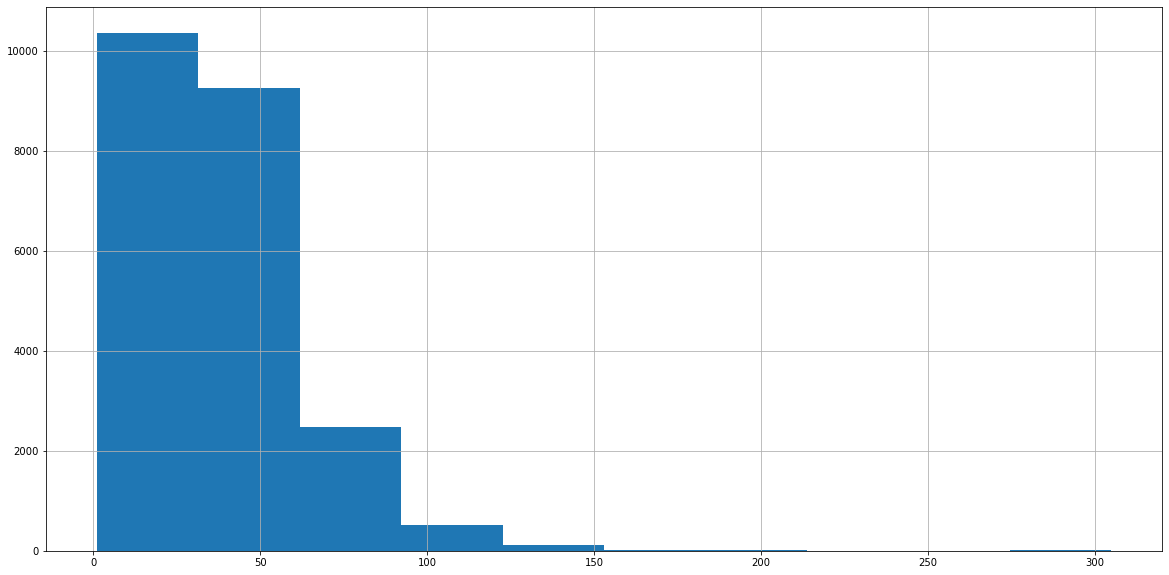

In [32]:
description_thai_word_count.hist(figsize = (20, 10))

In [33]:
description_thai_tokenize

0        [ความหมาย, ของ, งานวิจัย, และ, จริยธรรม, การวิ...
1        [หลักการ, การ, ริเริ่ม, การเปลี่ยนแปลง, ของ, ส...
2        [ภาพรวม, ของ, กิจการ, ภิ, บาล, ปัญหา, และ, ต้น...
3        [การศึกษา, รายวิชา, เพิ่มเติม, ใน, ต่างประเทศ,...
4        [การศึกษา, รายวิชา, เพิ่มเติม, ใน, ต่างประเทศ,...
                               ...                        
25154    [การ, อภิปราย, หัวข้อ, พิเศษ, ที่, เกี่ยวข้อง,...
25155    [เนื้อหาวิชา, ครอบคลุม, พัฒนาการ, และ, ความเปล...
25156    [หลักการ, ของ, การ, เพิ่ม, การ, เก็บ, กู้, น้ำ...
25157    [เนื้อหาวิชา, ครอบคลุม, ภาคทฤษฎี, และ, ภาคปฏิบ...
25158    [การวิจัย, ใน, เทคโนโลยี, ปิโตรเลียม, เพื่อ, ค...
Name: description_thai, Length: 22786, dtype: object

In [34]:
X_text = description_thai_tokenize.to_list()

In [35]:
from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, stop_words=stopwords)
tf_idf = vectorizer.fit_transform(X_text)

/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ก', 'ข', 'ค', 'ง', 'จ', 'ฉ', 'ช', 'ซ', 'ญ', 'ฏ', 'ด', 'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ส', 'ห', 'อ', 'ะ', 'ั', 'า', 'ำ', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'เ', 'แ', 'โ', 'ใ', 'ไ', '็', '่', '้', '๊', '๋', '์', 'ํ', '\ufeff'] not in stop_words.
  warnings.warn(


In [37]:
Y_text = df['faculty_no'].values

In [38]:
Y_text

array(['20', '20', '20', ..., '63', '63', '63'], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split

tf_train, tf_test, Y_tf_train, Y_tf_test = train_test_split(tf_idf, Y_text, test_size = 0.10, random_state = 42)

In [46]:
from sklearn import svm

clf = svm.SVC()
clf.fit(tf_train, Y_tf_train)

SVC()

In [47]:
Y_pred = clf.predict(tf_test)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(accuracy_score(Y_tf_test, Y_pred))
print(f1_score(Y_tf_test, Y_pred, average='micro'))

0.7898200965335673
0.7898200965335673


In [49]:
tf_idf.shape

(22786, 13939)

In [50]:
import skopt

In [129]:
from skopt.callbacks import CheckpointSaver
import time


class LifeSaver(object):

    current = 0
    def __init__(self, total, start = 0, **kwargs):
        self.current = start
        self._checkpoint_saver = CheckpointSaver(**kwargs)
        self.total = total
    def __call__(self, res):
        self._checkpoint_saver.__call__(res)
        self.current += 1
        print(f"{self.current}/{self.total}")


In [134]:
from skopt import load


x0 = []
y0 = []
try:
    res = load('./checkpoint.pkl')
    x0 = res.x_iters
    y0 = res.func_vals
except:
    print('error')

print(x0)
print(y0)

[[3.3108186896717307, 'rbf', 2, 0.6711266101623925], [0.00033551814926827497, 'rbf', 2, 4.29035995889377], [0.0008919763005596203, 'poly', 1, 3.101599867657219e-05], [0.06543527889685069, 'linear', 2, 1.2302823027169885], [0.2131906334829466, 'linear', 3, 14.273101079855673], [0.141645115505999, 'sigmoid', 3, 3.467809774016928e-05], [41.72776409082915, 'linear', 2, 0.0697824196604436], [0.0032132658526691405, 'rbf', 3, 0.041289776551754406], [6.237846841431372e-05, 'poly', 2, 0.0960665325906951], [1.6913898293443755e-06, 'rbf', 2, 0.0005435147159631662], [0.0068801667004534705, 'linear', 3, 21.661155168208193], [19.62255646305339, 'linear', 5, 0.0005312342102326412], [41.5493616256875, 'rbf', 4, 0.005147140720920628], [0.9563667993994027, 'poly', 3, 4.950340299837381], [28.328238532336346, 'poly', 3, 0.45883076303255255], [0.0005240805096055802, 'sigmoid', 1, 0.5224348342549675], [0.00013033653657864322, 'poly', 1, 0.00033878168177218793], [0.004169903385691833, 'poly', 4, 0.4943200139

In [135]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

# define the space of hyperparameters to search
search_space = list()
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='C'))
search_space.append(Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'))
search_space.append(Integer(1, 5, name='degree'))
search_space.append(Real(1e-6, 100.0, 'log-uniform', name='gamma'))

# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
  # configure the model with specific hyperparameters
  model = SVC()
  model.set_params(**params)
  # define test harness
  cv = KFold(n_splits=5, shuffle=True)
  # calculate 5-fold cross validation
  result = cross_val_score(model, tf_train, Y_tf_train, cv=cv, n_jobs=-1, scoring='f1_micro')
  # calculate the mean of the scores
  estimate = mean(result)
  # convert from a maximizing score to a minimizing score
  print('estimate', estimate, params)
  return 1.0 - estimate


n_calls = 50

# perform optimization
result = gp_minimize(evaluate_model, search_space, x0 = x0, y0 = y0, n_calls=n_calls, callback=LifeSaver(total=n_calls, start=len(x0), checkpoint_path="./checkpoint.pkl", compress=9))
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))

25/50
estimate 0.1164483790625088 {'C': 0.008896098087118868, 'kernel': 'poly', 'degree': 4, 'gamma': 3.50327351733555e-05}
26/50
estimate 0.11644804617108884 {'C': 3.44421046402916e-06, 'kernel': 'sigmoid', 'degree': 4, 'gamma': 0.002621679832730066}
27/50
estimate 0.11644801050415096 {'C': 9.6638120058881e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 3.570332828448076}
28/50
estimate 0.11649695743186635 {'C': 1.5006671555168645, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.0020837583469377084}
29/50
estimate 0.5962846939735121 {'C': 0.01564331094700346, 'kernel': 'poly', 'degree': 4, 'gamma': 69.08011951865038}
30/50
estimate 0.11644823639475739 {'C': 4.5264978798691355e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 3.679704260698996e-05}
31/50
estimate 0.11644763005681387 {'C': 2.341558871757241e-05, 'kernel': 'poly', 'degree': 3, 'gamma': 1.6622144343259467e-05}
32/50
estimate 0.11644808183802668 {'C': 0.18038890317535033, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.0027740447522256687}


KeyboardInterrupt: 

In [ ]:
import numpy as np

In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import Input
MAX_WORDS = 2500
MAX_SEQUENCE_LENGTH = description_thai_word_count.max()
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(X_text)
word_index = tokenizer.word_index
X = np.array(tokenizer.texts_to_sequences(X_text))

In [ ]:
# X = np.array(list(map(lambda x: np.array(x), X)))

In [ ]:
tokenizer_y = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer_y.fit_on_texts(Y_text)
word_index_y = tokenizer_y.word_index
Y = np.array(tokenizer_y.texts_to_sequences(Y_text))
Y

In [ ]:
len(word_index_y.keys())

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
Y = enc.fit_transform(Y).toarray()
Y

In [ ]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
X

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 42)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

## Train model

In [ ]:
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1], mask_zero=True))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 2048

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


In [ ]:
epochs = 5
batch_size = 2048
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
epochs = 5
batch_size = 2048
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
epochs = 5
batch_size = 2048
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
epochs = 5
batch_size = 2048
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
epochs = 5
batch_size = 2048
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
model.save_weights('/content/drive/My Drive/model_chula_course.h5')

In [ ]:
for x in X_test[0]:
  if x != 0:
    key =  list(word_index.keys())[list(word_index.values()).index(x)]
    print(key, end='')

In [ ]:
word_index

In [ ]:
model.predict(X_test[0].reshape(1, X_test.shape[1]))

In [ ]:
enc.inverse_transform([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [ ]:
word_index_y

In [ ]:
Y_test[0]

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
len(X_test)

In [ ]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

In [ ]:
# explain the model on two sample inputs

explainer = shap.DeepExplainer(model, X_train[:100])

shap_values = explainer.shap_values(X_test[:10])